### Matplotlib: основы визуализации данных в Python

Библиотека `matplotlib` позволяет строить различные графики. Так как она не является встроенной, её необходимо установить через командную строку, набрав `pip install matplotlib`. Чтобы открыть командную строку, нажмите сначала клавишу Windows, введите буквы `cmd` и нажмите Enter.

NB: В среде Google Colab библиотека установлена по умолчанию.

Библиотека `matplotlib` большая и разветвлённая, нам потребуется её часть, которая называется `pyplot`. Для сокращения принято импортировать `matplotlib.pyplot` под сокращённым названием `plt`. Эта строчка должна быть наверху вашей программы вместе с другими `import`ами.

Обычный линейный график можно построить с помощью функции `plt.plot()`. Он принимает на вход два индексируемых объекта (обычно списка или `numpy`-массива), один из которых будет содержать все координаты точек по оси X, а второй &mdash; по оси Y. Длины списков должны совпадать. Если вы передаёте только один список, то он будет интерпретирован как координаты по оси Y, а координаты по оси X будут его индексами (то есть числами от 0 до его длины не включая).

Чтобы вывести график на экран, нужно вызвать функцию `plt.show()`.

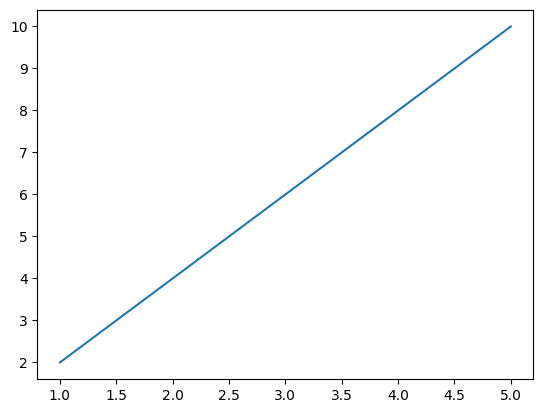

In [2]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

plt.plot(x, y)
plt.show()

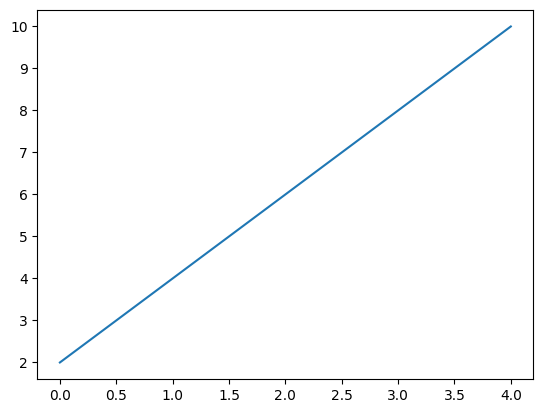

In [ ]:
plt.plot(y)
plt.show()

Если список координат X будет содержать числа (целые или вещественные), то координатами будут эти числа. Если он будет содержать строки, они станут подписями для равномерно распределённых по оси X меток: 

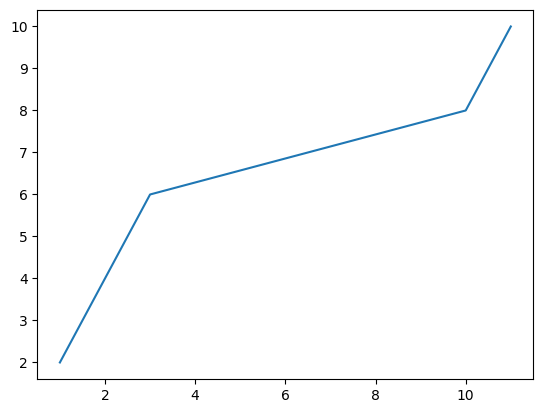

In [4]:
x = [1, 2, 3, 10, 11]
y = [2, 4, 6, 8, 10]
plt.plot(x, y)

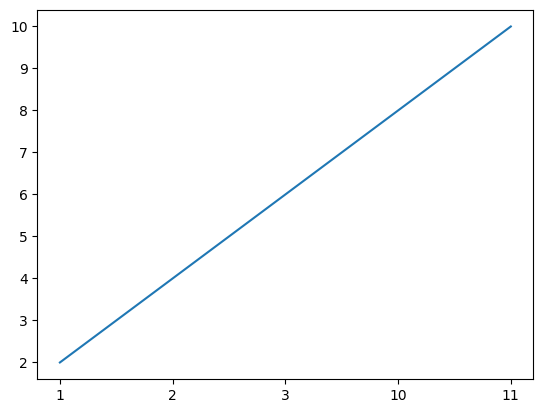

In [5]:
x = ["1", "2", "3", "10", "11"]
y = [2, 4, 6, 8, 10]
plt.plot(x, y)

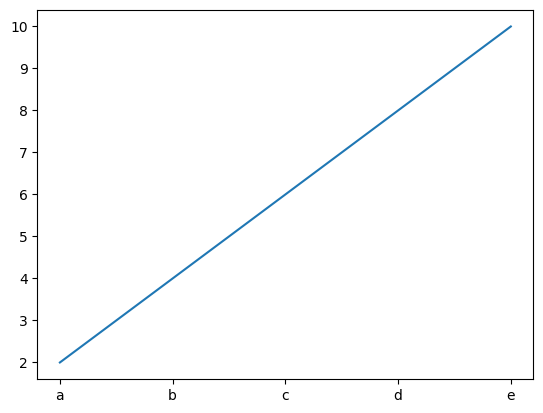

In [6]:
x = ["a", "b", "c", "d", "e"]
y = [2, 4, 6, 8, 10]
plt.plot(x, y)

Обратите внимание, что точки соединяются в том порядке, в котором их координаты указаны в списке X. Если точки не отсортированы, график может выглядеть так:

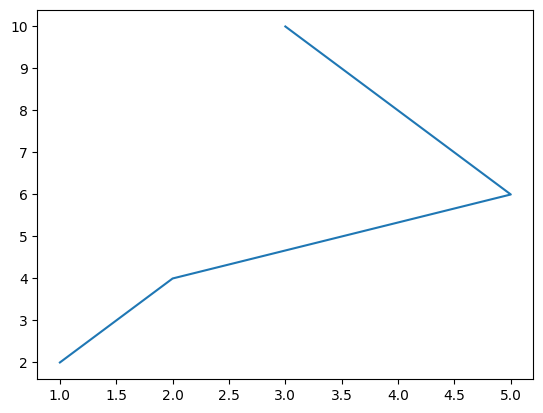

In [8]:
x2 = [1, 2, 5, 4, 3]
y2 = [2, 4, 6, 8, 10]
plt.plot(x2, y2)
plt.show()

Простой способ отсортировать два параллельных списка в порядке возрастания первого с помощью `zip()`: 

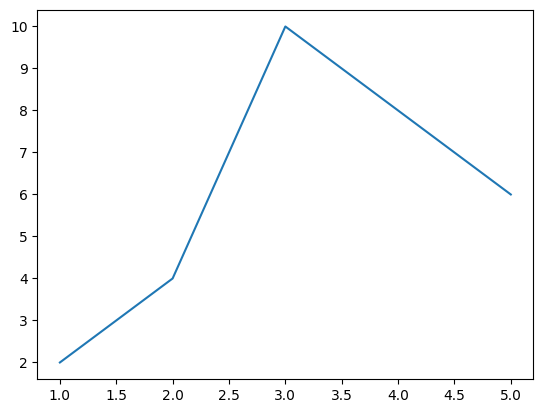

In [9]:
pairs = list(zip(x2, y2))
pairs.sort(key=lambda x: x[0])
x2, y2 = zip(*pairs)
plt.plot(x2, y2)
plt.show()

Ряд функций служит для того, чтобы добавлять заголовок и подписи к осям:

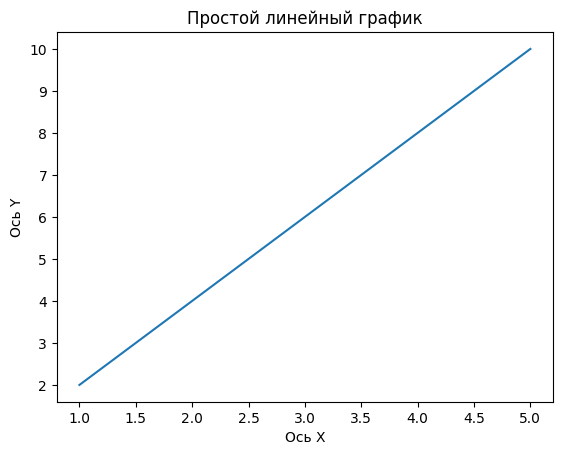

In [ ]:
plt.plot(x, y)
plt.title("Простой линейный график")
plt.xlabel("Ось X")
plt.ylabel("Ось Y")
plt.show()

Дополнительные детали:
* параметр `label` позволяет передать название данных, которые потом можно вывести на легенде с помрщью функции `plt.legend()`
* параметры `color`, `linestyle`, `linewidth` и `marker` управляют визуальными характеристиками графика. Цвет может быть задан словом или как hex-значение. Руководства по стилям линий и маркеров:
https://matplotlib.org/stable/api/markers_api.html
https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html
* функция `plt.grid()` накладывает на график координатную сетку.

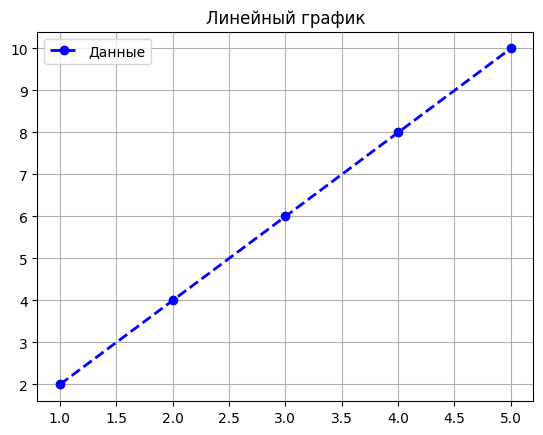

In [ ]:
plt.plot(x, y, color='blue', linestyle='--', linewidth=2, marker='o', label='Данные')
plt.legend()
plt.title("Линейный график")
plt.grid()
plt.show()

Легенда полезна, когда на одном графике несколько линий:

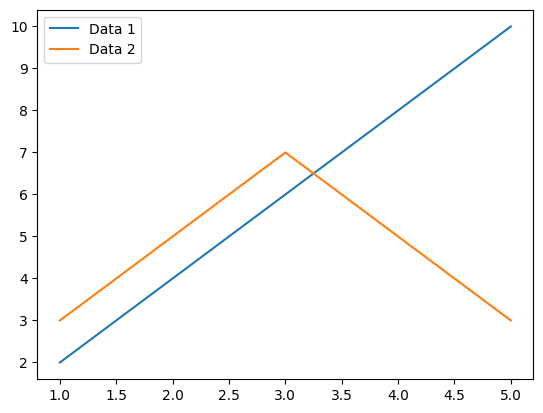

In [3]:
x = [1, 2, 3, 4, 5]
y1 = [2, 4, 6, 8, 10]
y2 = [3, 5, 7, 5, 3]

plt.plot(x, y1, label="Data 1")
plt.plot(x, y2, label="Data 2")
plt.legend()
plt.show()

`plt.scatter()` строит точечный график.

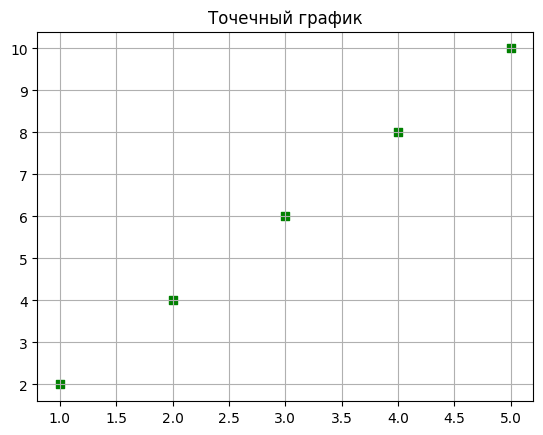

In [ ]:
plt.scatter(x, y, c='green', marker='s')
plt.grid()
plt.title("Точечный график")
plt.show()

`plt.bar()` строит столбчатую диаграмму.

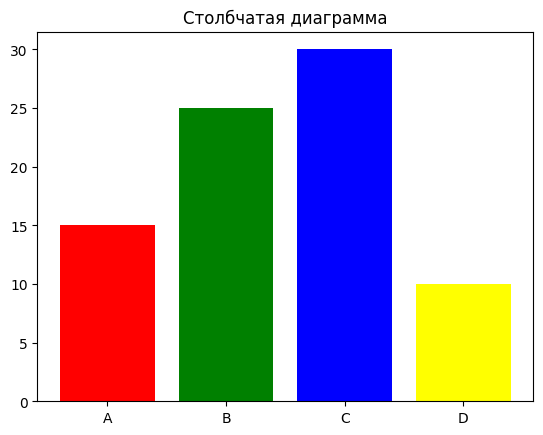

In [ ]:
categories = ['A', 'B', 'C', 'D']
values = [15, 25, 30, 10]
plt.bar(categories, values, color=['red', 'green', 'blue', 'yellow'])
plt.title("Столбчатая диаграмма")
plt.show()

`plt.hist()` строит гистограмму.

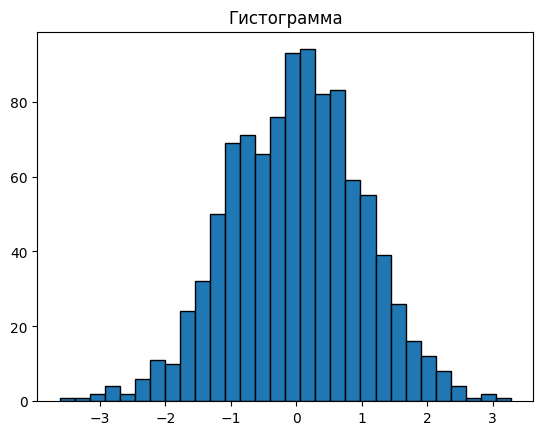

In [ ]:
import numpy as np
data = np.random.randn(1000)
plt.hist(data, bins=30, edgecolor='black')
plt.title("Гистограмма")
plt.show()

`plt.pie()` строит круговую диаграмму.

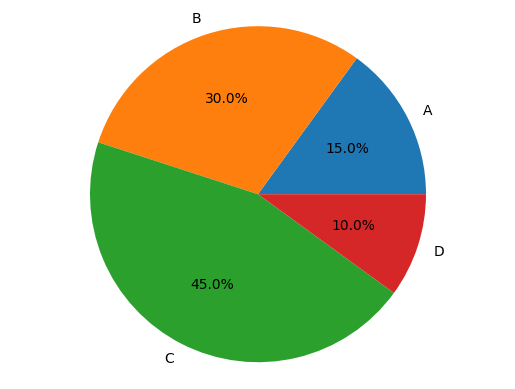

In [ ]:
sizes = [15, 30, 45, 10]
labels = ['A', 'B', 'C', 'D']
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')  # Чтобы диаграмма была круглой
plt.plot("Круговая диаграмма")
plt.show()

### Работа с несколькими графиками

Функция `plt.subplots()` позволяет уместить несколько графиков на одно изображение. Она возвращает объект класса `Figure`, который позволяет управлять свойствами всего изображения, и один или несколько объектов класса `Axes`, каждый из которых соответствует отдельному графику. Ранее рассмотренные функции доступны также как методы этих объектов.

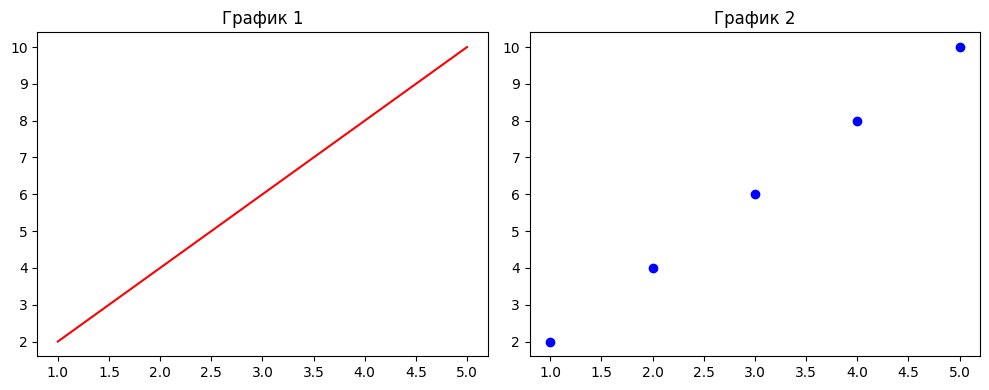

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4)) # аргументы - число строк, число колонок, размер рисунка в дюймах

ax1.plot(x, y, 'r-')
ax1.set_title('График 1')

ax2.scatter(x, y, c='b')
ax2.set_title('График 2')

plt.tight_layout()
plt.show()

Две разные оси X на одном графике:

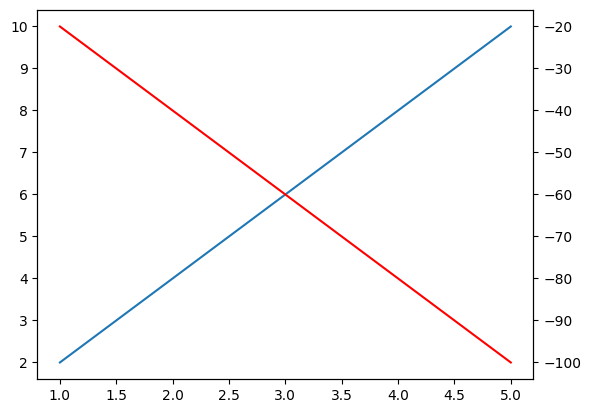

In [ ]:
fig, ax = plt.subplots()
ax_2 = plt.twinx(ax)
ax.plot(x, y)
ax_2.plot(x, [-10 * i for i in y], color="red")
plt.show()

Сохранение в файл:

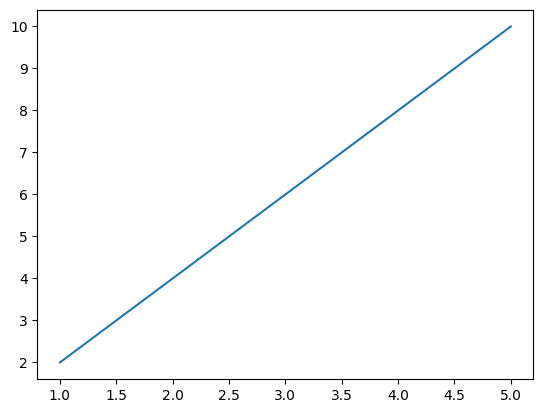

In [ ]:
plt.plot(x, y)
plt.savefig('my_plot.png', dpi=300, bbox_inches='tight')

In [ ]:
plt.savefig("plot.png")

### Задания для самостоятельного выполнения

На всех графиках должны быть подписаны оси (величина, единица измерения), где это применимо, и сделаны легенды, если на графике больше одной линии. Графики могут быть на одном рисунке или на разных. Графики сохранить в файлы.

#### Задание 1

Построить график функции $ f(x) = x^2 - 2x + 5 $ на промежутке от &minus;2 до 4 с шагом 0.1.

#### Задание 2

На том же графике построить график функции $ g(x) = 2x - 2 $. Задайте первому графику чёрный цвет, а второму &mdash; красный.

#### Задание 3

1. Открыть файл d07_s02_01_tempo.txt, считать из него данные (это таблица `tsv`). Таблица содержит данные для вычисления темпа одного из собеседников в диалоге: номер реплики, время начала и конца (в секундах), роль в совместном задании (L &mdash; ведущий, F &mdash; ведомый), количество слогов в реплике. Если роль реплики помечена как NOUSE, её надо пропустить.
2. Построить график зависимости темпа речи от времени начала реплики (т.е. график, показывающий, как темп диктора менялся в течение диалога)
3. Построить точечный график зависимости темпа речи от длительности реплики (верно ли, что более длинные реплики произносятся быстрее?)
4. Построить столбчатую или круговую диаграмму распределения реплик по ролям.
5. Построить гистограмму распределения длины реплик в слогах.

#### Задание 4

1. Открыть файл d07_z06_01_tempo, содержащий данные о темпе второго собеседника.
2. Построить графики зависимости темпа обоих дикторов на одной иллюстрации (см. п. 2 из задания 3).

#### Задание 5 (*)

Построить любые другие графики на основании двух таблиц.

### Домашнее задание

Используя таблицу HollywoodMovies.csv, постройте:
1. график зависимости среднего бюджета фильма от года;
2. круговую или стоблчатую диаграмму распределения жанров фильмов с 2007 по 2010;
3. (*) столбчатую диаграмму средней оценки Rotten Tomatoes для четырёх самых больших (по количеству фильмов) студий.